## Plots of TOON Atlas vs Neckel Labs 

Tom Schad | 22 April 2024

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.dpi"] = 120
plt.rcParams["image.origin"] = 'lower'
plt.rcParams["image.cmap"] = 'gray'
plt.rcParams["image.interpolation"] = 'nearest'

In [2]:
import numpy as np

## LOAD SOLAR ATLAS
def vac2air(wave_vac):
    """ Converts wavelengths from vacuum to air-equivalent """
    wave_air = np.copy(wave_vac)
    ww  = (wave_vac >= 2000) 
    sigma2 = (1e4 / wave_vac[ww])**2 
    n = 1 + 0.0000834254 + 0.02406147 / (130 - sigma2) + 0.00015998 / (38.9 - sigma2)
    wave_air[ww] = wave_vac[ww] / n
    return wave_air

def load_telluric_atlas(): 
    ## Telluric synthetic atlas
    wvAng  = np.load('./telluric_atlas_mainMol_USstd_wv_air_angstrom_v20240307.npy').astype(float)
    spTell = np.load('./telluric_atlas_mainMol_USstd_CO2_416ppm-Base_3km-PWV_3__mm-Airmass_1___v20240307.npy').astype(float)
    return wvAng,spTell

def load_toon_atlas(): 
    ## Telluric synthetic atlas
    ## Disk Center TOON Spectra 
    dc = np.loadtxt('./solar_merged_20200720_600_33300_000.out',skiprows =3)  ## disk center
    dcwv = vac2air(1e8/dc[:,0])[::-1]  #/ 10.  ## into angstrom 
    dcsp = dc[:,1][::-1]  
    ## Disk Center TOON Spectra 
    dc = np.loadtxt('./solar_merged_20200720_600_33300_100.out',skiprows =3)  ## disk integ -- 100
    diwv = vac2air(1e7/dc[:,0]*10)[::-1]  #/ 10
    disp = dc[:,1][::-1]  
    return dcwv,dcsp,diwv,disp 

def load_neckel_diskcen_atlas(): 
    dcen = np.load('./Neckel_Labs/neckel_labs_1984_disk_center_atlas.npy') 
    neckel_labs_wv_diskcent = dcen[:,0] 
    neckel_labs_Inorm_diskcenter = dcen[:,1]/dcen[:,2]
    return neckel_labs_wv_diskcent,neckel_labs_Inorm_diskcenter

def load_neckel_integ_atlas(): 
    dcen = np.load('./Neckel_Labs/neckel_labs_1984_disk_integated_atlas.npy')
    neckel_labs_wv_diskint = dcen[:,0] 
    neckel_labs_Inorm_diskint = dcen[:,1]/dcen[:,2]
    return neckel_labs_wv_diskint,neckel_labs_Inorm_diskint

wvAng,spTell = load_telluric_atlas()
## Disk Center TOON Spectra 
dcwv,dcsp,diwv,disp  = load_toon_atlas()
## Neckel labs 
neckel_labs_wv_diskcent,neckel_labs_Inorm_diskcenter= load_neckel_diskcen_atlas()    
## Neckel labs 
neckel_labs_wv_diskint,neckel_labs_Inorm_diskint = load_neckel_integ_atlas()

In [3]:
np.max(neckel_labs_wv_diskcent)

12509.982

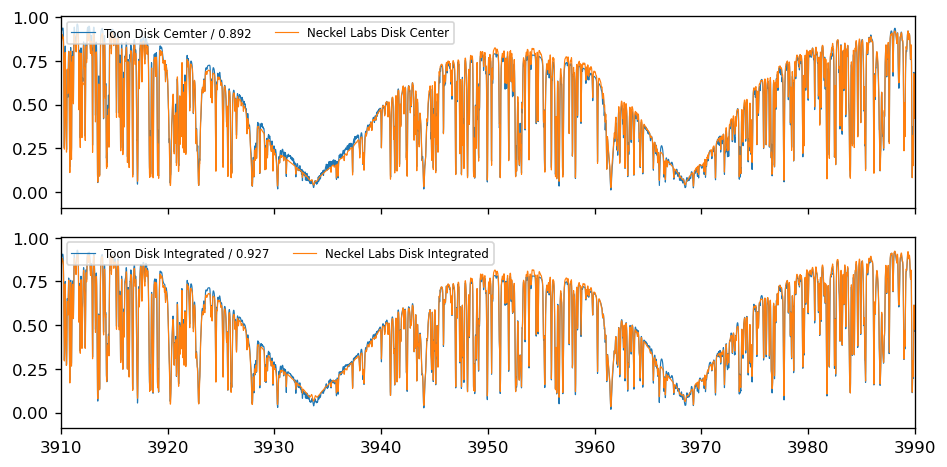

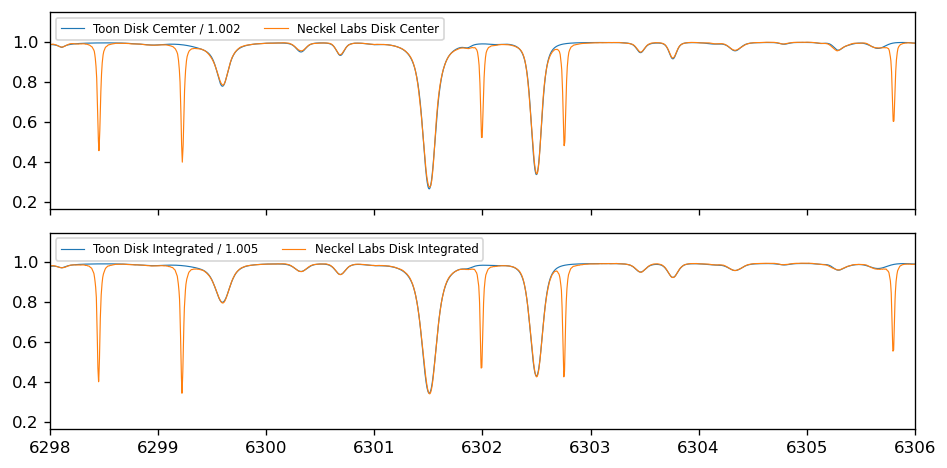

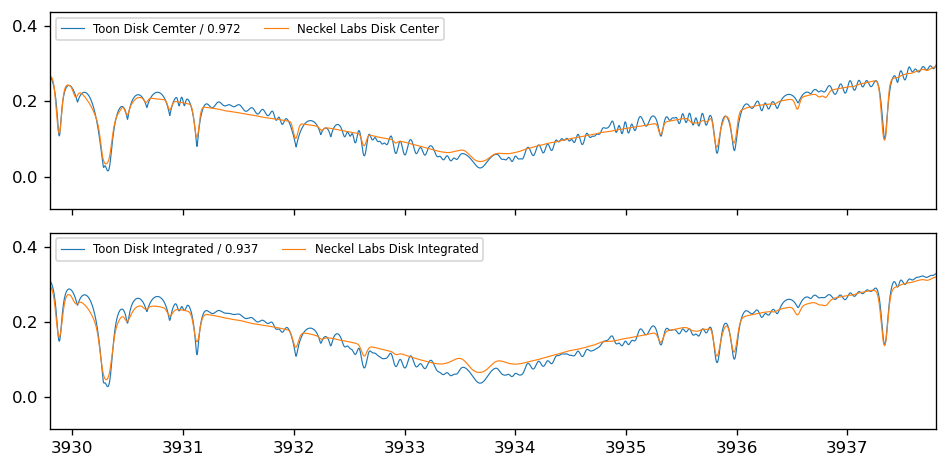

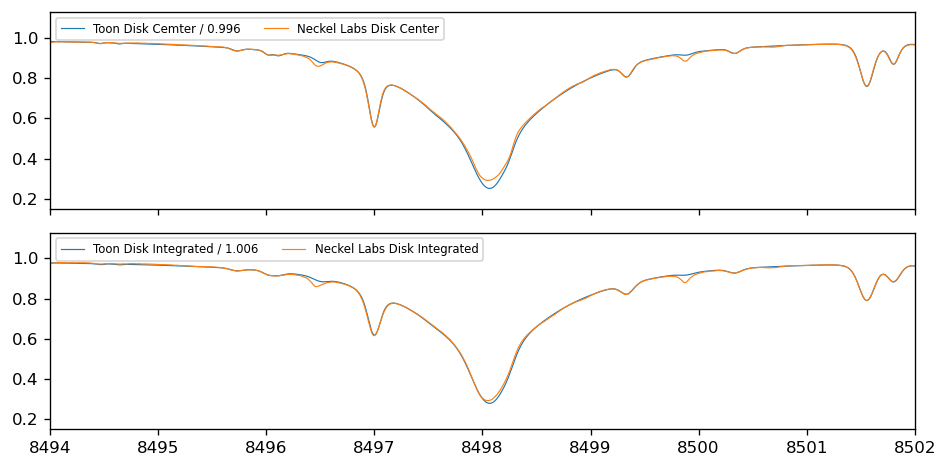

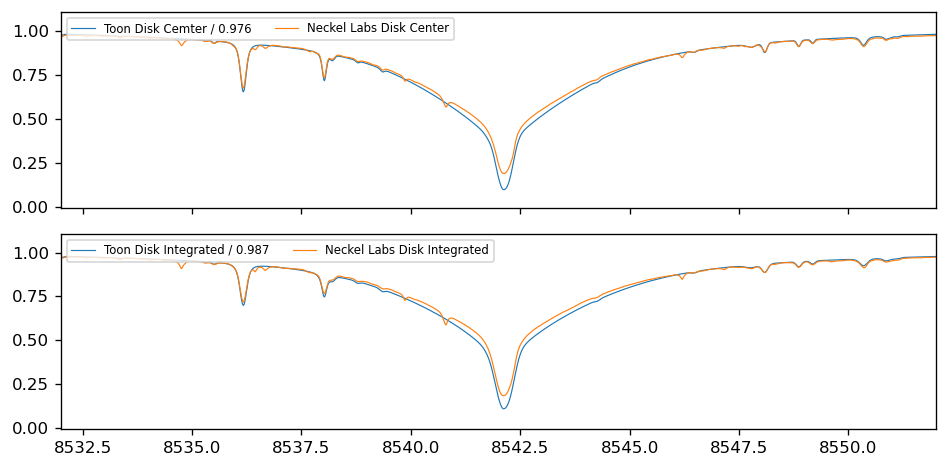

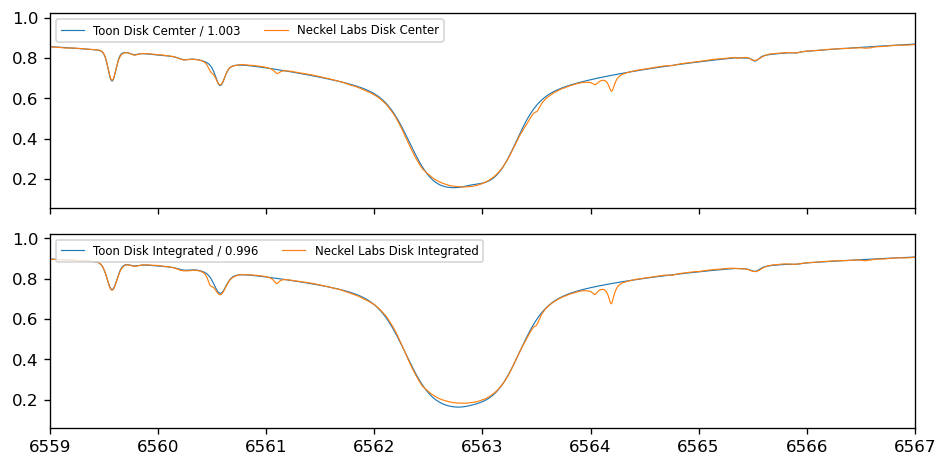

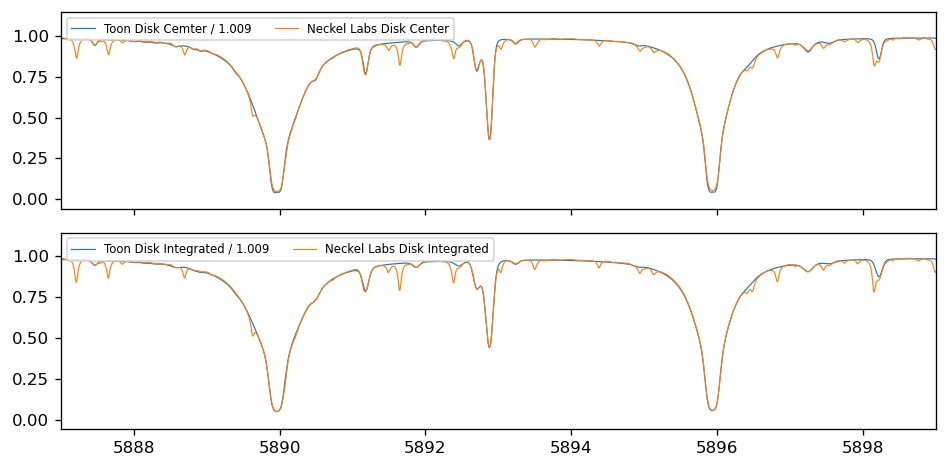

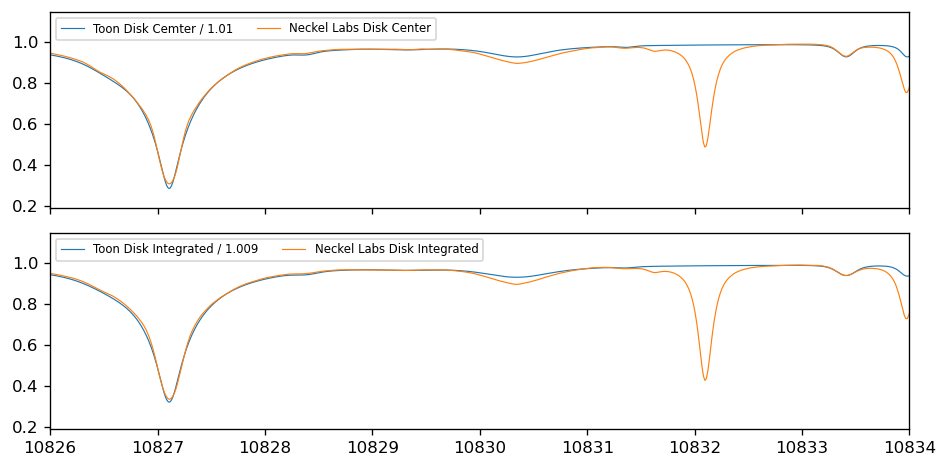

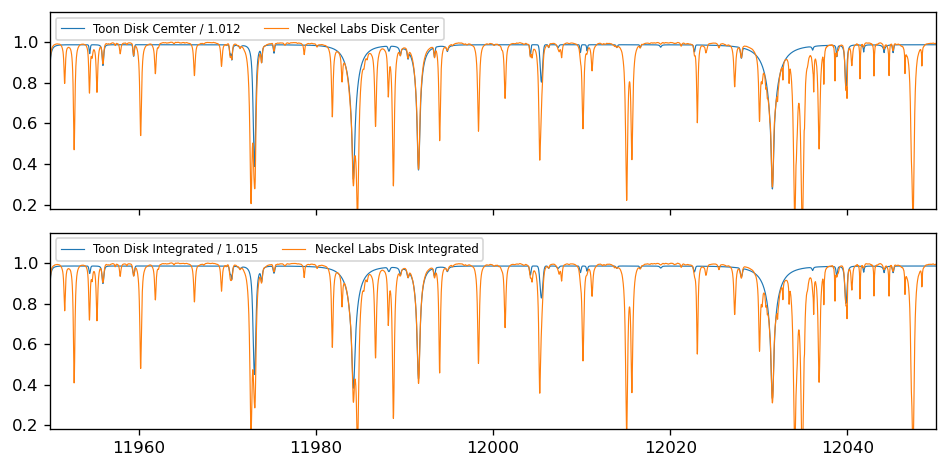

In [4]:

wvs =  np.array([3950,6302.,3933.8,8498.,8542,6563.,5893.,10830.,12000])
dws =  np.array([   40, 4,    4,   4,    10,   4,   6,  4, 50]) 

for n in range(len(wvs)):
    wvc = wvs[n]
    dwv = dws[n]

    wvInt = np.linspace(wvc-dwv,wvc+dwv,5000)
    
    fig,ax = plt.subplots(2,1,figsize = (8,4),sharex=True,sharey=True)

    mn = np.nanmedian( np.interp(wvInt,dcwv,dcsp) / np.interp(wvInt,neckel_labs_wv_diskcent,neckel_labs_Inorm_diskcenter) ) 

    ax[0].plot(wvInt,np.interp(wvInt,dcwv,dcsp) / mn ,label = f'Toon Disk Cemter / {np.round(mn,3)}',lw = 0.7)
    ax[0].plot(wvInt,np.interp(wvInt,neckel_labs_wv_diskcent,neckel_labs_Inorm_diskcenter),label = 'Neckel Labs Disk Center',lw = 0.7)

    mn = np.nanmedian( np.interp(wvInt,diwv,disp) / np.interp(wvInt,neckel_labs_wv_diskint,neckel_labs_Inorm_diskint) ) 
    
    ax[1].plot(wvInt,np.interp(wvInt,diwv,disp) / mn ,label = f'Toon Disk Integrated / {np.round(mn,3)}',lw = 0.7)
    ax[1].plot(wvInt,np.interp(wvInt,neckel_labs_wv_diskint,neckel_labs_Inorm_diskint),label = 'Neckel Labs Disk Integrated',lw = 0.7)

    ax[0].set_xlim(wvc-dwv,wvc+dwv)

    sp_crop = dcsp[(dcwv > (wvc-dwv) ) * (dcwv < (wvc+dwv))]
    ax[1].set_ylim(np.min(sp_crop)-0.1,np.max(sp_crop)+0.15)
    for axi in ax: axi.legend(ncol = 2,fontsize = 7,loc = 'upper left')
    
    fig.tight_layout()